<a href="https://colab.research.google.com/github/Muhammad-ismail2134/CODSOFT/blob/main/SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 04 Spam Detection

## Importing Libarires

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from ast import literal_eval

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
!pip install kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 65.8MB/s]


## Unzipping Dataset

In [ ]:
import zipfile

#Unzipping dataset from kaggle
local_zip = '/content/sms-spam-collection-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sms-spam-collection-dataset')

In [ ]:
spam_data = pd.read_csv('/content/sms-spam-collection-dataset/spam.csv',encoding='ISO-8859-1')

## Previewing Dataset

In [ ]:
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
spam_data = spam_data.drop(spam_data.columns[spam_data.columns.str.contains('Unnamed', case=False)], axis=1)

In [ ]:
spam_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print(f"Dataset Shape before cleaning : ",spam_data.shape)
spam_data.dropna(inplace=True)
spam_data = spam_data[spam_data['v2'].str.len()>0]
spam_data = spam_data[spam_data['v1'].str.len()>0]
print(f"Dataset Shape after cleaning : ",spam_data.shape)

Dataset Shape before cleaning :  (5572, 2)
Dataset Shape after cleaning :  (5572, 2)


## Removing Duplicate values

In [ ]:
spam_data = spam_data.copy()

spam_data.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")

Duplicated values dropped succesfully
****************************************************************************************************


## Naming Columns

In [ ]:
new_column_names = {
    'v2': 'message',
    'v1': 'label',
    # Add more columns as needed
}

# Rename columns using the rename method
spam_data.rename(columns=new_column_names, inplace=True)

In [ ]:
spam_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# converting Labels

In [ ]:
# changing labels to int 0 1
spam_data['label'] = spam_data['label'].replace({'ham': 0, 'spam': 1})
print(spam_data['label'][100:110])

100    0
101    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
Name: label, dtype: int64


In [ ]:
import plotly.express as px
labels=["Safe","Spam"]

fraud_or_not = spam_data["label"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=spam_data['label'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

In [ ]:
import re
def clean_text(text):
    # remove backslash-apostrophe
    text = re.sub("\'", "", text)
    # remove everything alphabets
    text = re.sub("[^a-zA-Z]"," ",text)
    # remove whitespaces
    text = ' '.join(text.split())
    # convert text to lowercase
    text = text.lower()
    return text

## Cleaning messages

In [ ]:
spam_data['cleaned_message'] = spam_data['message'].apply(lambda x: clean_text(x))
print(spam_data[200:203])

     label                                            message  \
202      0  Your account has been refilled successfully by...   
203      0                           Goodmorning sleeping ga.   
204      0                          U call me alter at 11 ok.   

                                       cleaned_message  
202  your account has been refilled successfully by...  
203                            goodmorning sleeping ga  
204                              u call me alter at ok  


## Removing stopwords


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

spam_data['cleaned_message'] = spam_data['cleaned_message'].apply(lambda x: remove_stopwords(x))

In [ ]:
print(spam_data['cleaned_message'][400])
print(spam_data['message'][400])

free ringtone text first poly text get true tone help st free tones x pw e nd txt stop
FREE RINGTONE text FIRST to 87131 for a poly or text GET to 87131 for a true tone! Help? 0845 2814032 16 after 1st free, tones are 3xå£150pw to eå£nd txt stop


## Splitting Dataset

In [ ]:
test_split = 0.2

# Initial train and test split.
train_df, test_df = train_test_split(
    spam_data,
    test_size=test_split,
    stratify=spam_data["label"].values,
)

# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 4135
Number of rows in validation set: 517
Number of rows in test set: 517


In [ ]:
labels=["Safe","Spam"]
print("For Training")
fraud_or_not = train_df["label"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=train_df['label'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()
print('For Testing')
fraud_or_not = test_df["label"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=test_df['label'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

For Training


For Testing


In [ ]:
train_df["cleaned_message"].apply(lambda x: len(x.split(" "))).describe()

count    4135.000000
mean        9.140508
std         6.650719
min         1.000000
25%         4.000000
50%         7.000000
75%        13.000000
max        77.000000
Name: cleaned_message, dtype: float64

## Vectorizing Messages

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec= TfidfVectorizer()
vec.fit_transform(spam_data['cleaned_message'])
def vec_toArray(data):
  data = vec.transform(data['cleaned_message'])
  data = data.toarray()
  return data

In [ ]:
train_data = vec_toArray(train_df)
test_data = vec_toArray(test_df)

## Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(sampling_strategy=1)

In [ ]:
X_train_ros, y_train_ros = ROS.fit_resample(train_data, train_df['label'])

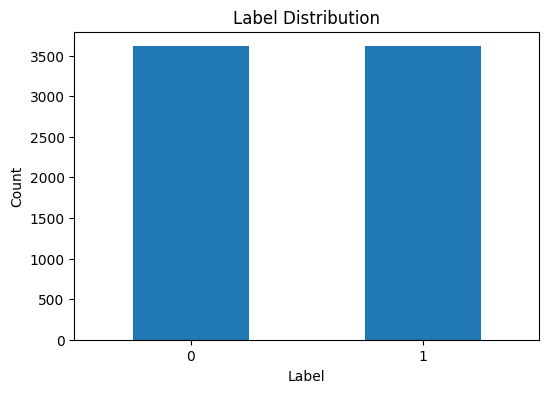

In [ ]:
labels_count = y_train_ros.value_counts()

plt.figure(figsize=(6, 4))
labels_count.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Fitting Oversampled data on Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X_train_ros,y_train_ros)

GaussianNB()

## Predicting Test Data Labels  

In [ ]:
y_pred = model.predict(test_data)

## Evaluating Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(testing_labels, y_pred, labels=[1,0]))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       465
           1       0.45      0.90      0.60        52

    accuracy                           0.88       517
   macro avg       0.72      0.89      0.77       517
weighted avg       0.93      0.88      0.90       517

